# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the DataSet

In [2]:
train = pd.read_csv('tblTrain.csv')
test = pd.read_csv('tblTest.csv')

In [3]:
train.head()

,Name,Duration,Genre,Rating
0,#Gadhvi (He thought he was Gandhi),99,Drama,7.0
1,@Andheri,126,Action,4.0
2,1:1.6 An Ode to Lost Love,86,Drama,6.2
3,13B: Fear Has a New Address,136,Drama,7.3
4,15th August,158,Drama,5.6


# Plotting Rating Against Duration

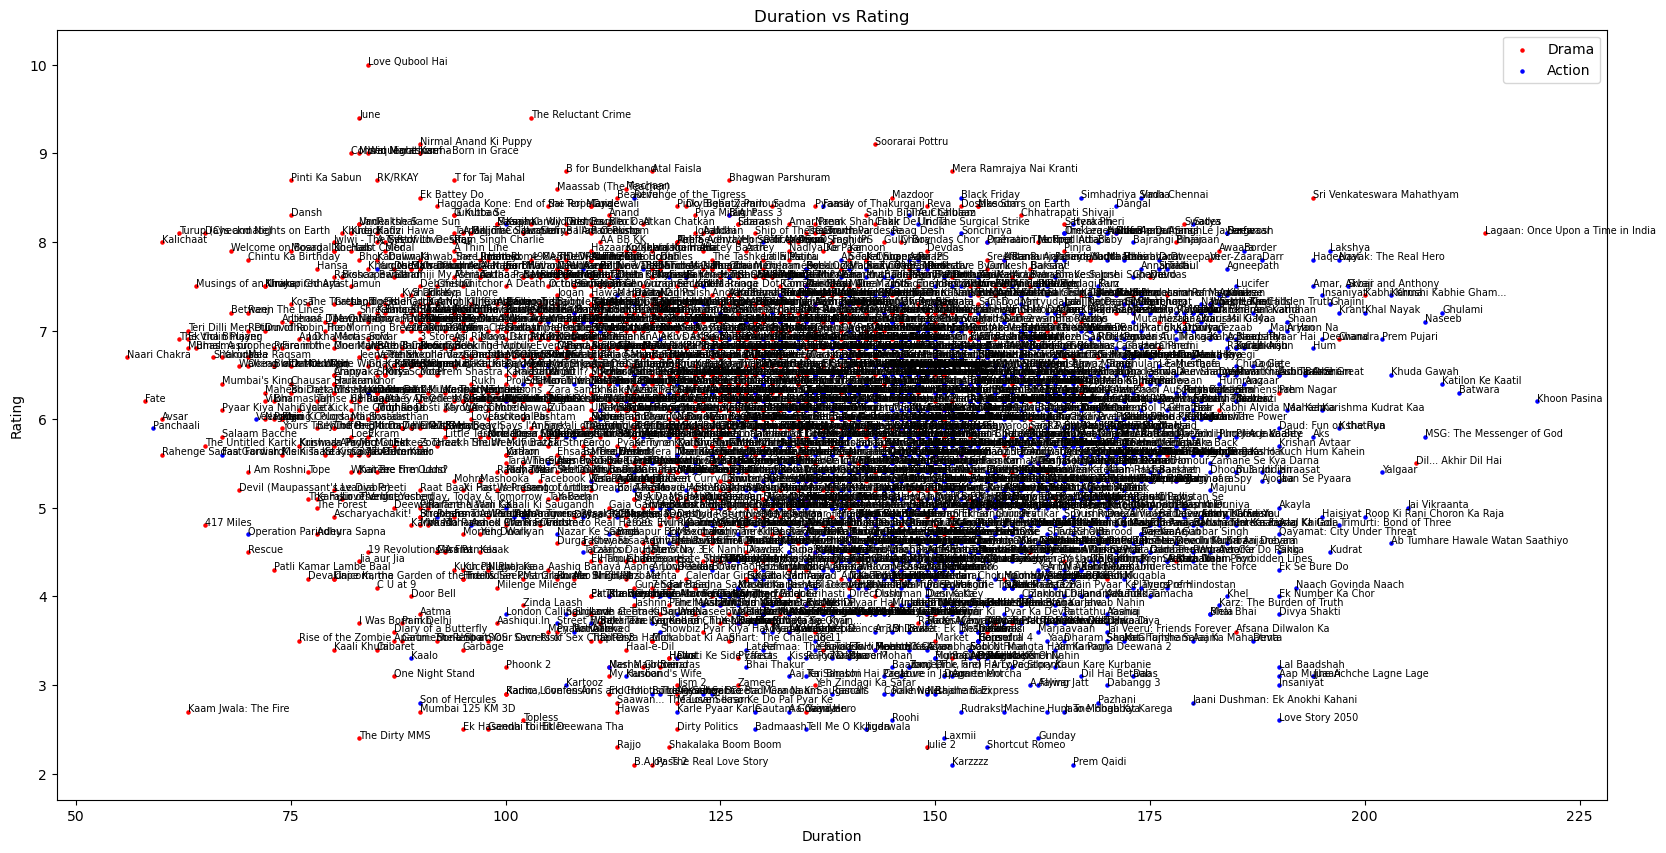

In [14]:
drama = train[train['Genre'] == 'Drama']
action = train[train['Genre'] == 'Action']

plt.figure(figsize = (20, 10))

plt.scatter(drama['Duration'], drama['Rating'], color = 'red', label = 'Drama', s=5)

# annotating the points with the movie names
for i in range(len(drama)):
    plt.annotate(drama['Name'].iloc[i], (drama['Duration'].iloc[i], drama['Rating'].iloc[i]), fontsize = 7, color = 'red')


plt.scatter(action['Duration'], action['Rating'], color = 'blue', label = 'Action', s=5)

# annotating the points with the movie names
for i in range(len(action)):
    plt.annotate(action['Name'].iloc[i], (action['Duration'].iloc[i], action['Rating'].iloc[i]), fontsize = 7, color = 'blue')

plt.title('Duration vs Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.legend()

plt.show()